---
title: "의사결정나무의 활용 | 다중공선성, 오버피팅, 이상치"
author: "강신성"
date: "2023-11-01"
date-format: iso
categories: [python, MultipleLinearity, Outlier]
---




> 의사결정나무를 이용하여 모형을 간단하게 적합해보자!

## 1. 라이브러리 imports

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn.tree
import seaborn as sns
import sklearn.model_selection

## 2. 다중공선성

### **A. Data**
---




In [53]:
np.random.seed(43052)
df = pd.read_csv("https://raw.githubusercontent.com/guebin/MP2023/main/posts/employment_multicollinearity.csv")
df['employment_score'] = df.gpa * 1.0 + df.toeic* 1/100 + np.random.randn(500)
df

,employment_score,gpa,toeic,toeic0,toeic1,toeic2,toeic3,toeic4,toeic5,toeic6,...,toeic490,toeic491,toeic492,toeic493,toeic494,toeic495,toeic496,toeic497,toeic498,toeic499
0,1.784955,0.051535,135,129.566309,133.078481,121.678398,113.457366,133.564200,136.026566,141.793547,...,132.014696,140.013265,135.575816,143.863346,152.162740,132.850033,115.956496,131.842126,125.090801,143.568527
1,10.789671,0.355496,935,940.563187,935.723570,939.190519,938.995672,945.376482,927.469901,952.424087,...,942.251184,923.241548,939.924802,921.912261,953.250300,931.743615,940.205853,930.575825,941.530348,934.221055
2,8.221213,2.228435,485,493.671390,493.909118,475.500970,480.363752,478.868942,493.321602,490.059102,...,484.438233,488.101275,485.626742,475.330715,485.147363,468.553780,486.870976,481.640957,499.340808,488.197332
3,2.137594,1.179701,65,62.272565,55.957257,68.521468,76.866765,51.436321,57.166824,67.834920,...,67.653225,65.710588,64.146780,76.662194,66.837839,82.379018,69.174745,64.475993,52.647087,59.493275
4,8.650144,3.962356,445,449.280637,438.895582,433.598274,444.081141,437.005100,434.761142,443.135269,...,455.940348,435.952854,441.521145,443.038886,433.118847,466.103355,430.056944,423.632873,446.973484,442.793633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,9.057243,4.288465,280,276.680902,274.502675,277.868536,292.283300,277.476630,281.671647,296.307373,...,269.541846,278.220546,278.484758,284.901284,272.451612,265.784490,275.795948,280.465992,268.528889,283.638470
496,4.108020,2.601212,310,296.940263,301.545000,306.725610,314.811407,311.935810,309.695838,301.979914,...,304.680578,295.476836,316.582100,319.412132,312.984039,312.372112,312.106944,314.101927,309.409533,297.429968
497,2.430590,0.042323,225,206.793217,228.335345,222.115146,216.479498,227.469560,238.710310,233.797065,...,233.469238,235.160919,228.517306,228.349646,224.153606,230.860484,218.683195,232.949484,236.951938,227.997629
498,5.343171,1.041416,320,327.461442,323.019899,329.589337,313.312233,315.645050,324.448247,314.271045,...,326.297700,309.893822,312.873223,322.356584,319.332809,319.405283,324.021917,312.363694,318.493866,310.973930


> 유사 토익들이 매우 많은, 설명변수에 다중공선성이 존재하는 자료이다.

\- 근데 `Lasso`를 쓰지 않고도, 여러 설명변수를 배제하지 않고도, 자료를 쉽게 적합할 수 있는 방법이 있다면 믿겠는가???

In [54]:
## 1
df_train, df_test = sklearn.model_selection.train_test_split(df, test_size = 0.3, random_state = 202014107)

X = df_train.drop('employment_score', axis = 1)
y = df_train.employment_score
XX = df_test.drop('employment_score', axis = 1)
yy = df_test.employment_score  ## 실제로는 알 수 없는 자료

## 2
predictr = sklearn.tree.DecisionTreeRegressor()

## 3
predictr.fit(X, y)

## 4
predictr.score(X, y), predictr.score(XX, yy)

(1.0, 0.8203054095383844)

> 본래 모델은 트리 모형의 작동방식에 따라 정확도가 1이 나오지만, 예측 모델의 성능도 나름 나쁘지 않다.

In [14]:
## 1
df_train, df_test = sklearn.model_selection.train_test_split(df, test_size = 0.3, random_state = 202014107)

X = df_train.drop('employment_score', axis = 1)
y = df_train.employment_score
XX = df_test.drop('employment_score', axis = 1)
yy = df_test.employment_score  ## 실제로는 알 수 없는 자료

## 2
predictr = sklearn.linear_model.LassoCV(alphas = np.linspace(0.1, 2, 20))

## 3
predictr.fit(X, y)

## 4

C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.066e+01, tolerance: 2.693e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.424e+00, tolerance: 2.693e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

LassoCV(alphas=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]))

In [15]:
predictr.score(X, y), predictr.score(XX, yy)

(0.9554916123291357, 0.8733838672032972)

> Lasso로 적합한 결과가 더 스코어가 높긴 하지만, 트리 모형은 직관적이고 단순하다. 그리고 하이퍼파라미터도 바꿀 수 있잖아?

In [47]:
## 1
df_train, df_test = sklearn.model_selection.train_test_split(df, test_size = 0.3, random_state = 202014107)

X = df_train.drop('employment_score', axis = 1)
y = df_train.employment_score
XX = df_test.drop('employment_score', axis = 1)
yy = df_test.employment_score  ## 실제로는 알 수 없는 자료

## 2
predictr = sklearn.tree.DecisionTreeRegressor(max_depth = 5)
## 3
predictr.fit(X, y)

## 4
predictr.score(X, y), predictr.score(XX, yy)

(0.9435995918442013, 0.853062350997775)

### **B. 평가**
---




* Lasso가 좀 더 좋긴 한데, 의사결정나무도 공선성이 있는 상황에서 간단하게 사용가능하다.

> Lasso는 엄청 발전된 모델이고, 의사결정나무는 아주 초기모델이라... 개선의 여지가 많다.

## 3. 오버피팅

### **A. 사전작업**
---




* 종속변수와 관련이 없는 변수들을 무작위로 생성하는 함수

In [15]:
def generating_df(n_balance):
    global df
    df = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/main/posts/employment.csv')
    df_balance = pd.DataFrame((np.random.randn(500,n_balance)).reshape(500,n_balance)*1,columns = ['balance'+str(i) for i in range(n_balance)])
    return pd.concat([df,df_balance],axis=1)

In [14]:
## 물론 해당 함수에 df를 따로 입력하게 하여 length를 조절한 후 아무 df에 사용가능하도록 만들수도 있다.
def random_generation_df(df, n) :
    df_random = pd.DataFrame(np.random.randn(len(df), n), columns = ['random'+str(i) for i in range(n)])
    return pd.concat([df, df_random], axis = 1)

In [16]:
generating_df(1)

,toeic,gpa,employment,balance0
0,135,0.051535,0,0.039391
1,935,0.355496,0,0.616426
2,485,2.228435,0,0.985876
3,65,1.179701,0,1.677899
4,445,3.962356,1,-0.167288
...,...,...,...,...
495,280,4.288465,1,0.936697
496,310,2.601212,1,-0.184044
497,225,0.042323,0,-0.805794
498,320,1.041416,0,-0.483178


In [18]:
## 1
df_train, df_test = sklearn.model_selection.train_test_split(df, test_size = 0.3, random_state = 202014107)
X = df_train.drop('employment', axis = 1)
y = df_train.employment
XX = df_test.drop('employment', axis = 1)
yy = df_test.employment  ## 실제론 모름

### **B. 분석**
---




**`# 1` : 의사결정나무**

In [19]:
## 2
predictr = sklearn.tree.DecisionTreeClassifier()  ## 범주형일 때 더 유용

## 3
predictr.fit(X, y)

## 4
predictr.score(X, y), predictr.score(XX, yy)

(1.0, 0.82)

> 오버피팅된 상황이다.

`# 2` : Lasso(L1 penalty)

In [20]:
## 2
predictr = sklearn.linear_model.LogisticRegressionCV(penalty = 'l1', solver = 'liblinear')

## 3
predictr.fit(X, y)

## 4
df_train = df_train.assign(employment_hat = predictr.predict(X))
df_test = df_test.assign(employment_hat = predictr.predict(XX))

##-##
print('train score = ' + str(round(predictr.score(X, y), 4)))
print('test score = ' + str(round(predictr.score(XX, yy), 4)))

train score = 0.8829
test score = 0.8733


> ~역시 Lasso가 최고다~

`# 3` : Ridge(L2 penalty)

In [21]:
## 2
predictr = sklearn.linear_model.LogisticRegressionCV(penalty = 'l2')

## 3
predictr.fit(X, y)

## 4
df_train = df_train.assign(employment_hat = predictr.predict(X))
df_test = df_test.assign(employment_hat = predictr.predict(XX))

##-##
print('train score = ' + str(round(predictr.score(X, y), 4)))
print('test score  = ' + str(round(predictr.score(XX, yy), 4)))

train score = 0.8886
test score  = 0.88


> ~Ridge도 최고다~

### **C. 설명변수들의 증가**
---




\- 관련없는 변수들의 수가 커짐에 따라서 각 방법들의 train/test score는 어떻게 변화할까?

* 데이터프레임과 predictor, 반응변수 열 이름을 넣어주면 fitting하고, 스코어를 배출하는 함수

In [22]:
def fitting_df(df, predictor, response) :
    df_train, df_test = sklearn.model_selection.train_test_split(df, test_size = 0.3, random_state = 202014107)
    X = df_train.drop(response, axis = 1)
    y = df_train[response]
    XX = df_test.drop(response, axis = 1)
    yy = df_test[response]

    predictor.fit(X, y)

    return predictor.score(X, y), predictor.score(XX, yy)

* predictor의 리스트와 필요없는 설명변수들이 가득찬 열의 개수를 정의

In [23]:
predictrs = [sklearn.tree.DecisionTreeClassifier(),
             sklearn.linear_model.LogisticRegressionCV(penalty = 'l1', solver = 'liblinear'),
             sklearn.linear_model.LogisticRegressionCV(penalty = 'l2')]

n_balance_list = range(0, 5000, 50)

* 그것들을 기반으로 세 변수들에게서 피팅하면서 나온 점수들을 원소로 하는 리스트를 컴프리헨션

In [24]:
lst = [fitting_df(generating_df(n_balance), predictr, 'employment') for predictr, n_balance in [(predictr, n_balance) for n_balance in n_balance_list for predictr in predictrs]]

C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\sklearn\linear_model\_logistic.py:460: Converge

KeyboardInterrupt: 

> 좀 오래 걸릴 수밖에 없음...(이중으로 컴프리헨션 하는 게 훨씬 적합한 것 같긴 하다. 나중에 처리를 또 해야되니...)

\- 실험결과의 정리

In [ ]:
arr = np.array(lst)
tr = arr[:, :, 0]
tst = arr[:, :, 1]
arr.shape

In [ ]:
ar = np.array(lst)
arr = arr.reshape(100, 3, 2)
tr = arr[:, :, 0]
tst = arr[:, :, 1]

> 전반적으로 관련없는 변수가 많아질수록 스코어가 떨어지기는 하는데, 뒤로 갈수록 tree의 점수는 다른 것들보다 감소폭이 적어 역전되는 상황이다.

\- 이를 시각화해보자.

In [ ]:
pd.DataFrame(tr, columns = ['tree', 'lasso', 'ridge'])
_.assign(dataset = 'train')

In [ ]:
tr_score = pd.DataFrame(tr, columns = ['tree', 'lasso', 'ridge'])
tst_score = pd.DataFrame(tst, colunms = ['tree', 'lasso', 'ridge'])

result_df = pd.concat([tr_score, tst_score], axis = 0)

## 4. 이상치

### **A. 데이터**
---




In [28]:
np.random.seed(43052)
temp = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/temp.csv').iloc[:100,3].to_numpy()
temp.sort()
ice_sales = 10 + temp * 0.5 + np.random.randn(100)
ice_sales[0] = 200
df_train = pd.DataFrame({'temp':temp,'ice_sales':ice_sales})
df_train

,temp,ice_sales
0,-4.1,200.000000
1,-3.7,9.234175
2,-3.0,9.642778
3,-1.3,9.657894
4,-0.5,9.987787
...,...,...
95,12.4,17.508688
96,13.4,17.105376
97,14.7,17.164930
98,15.0,18.555388


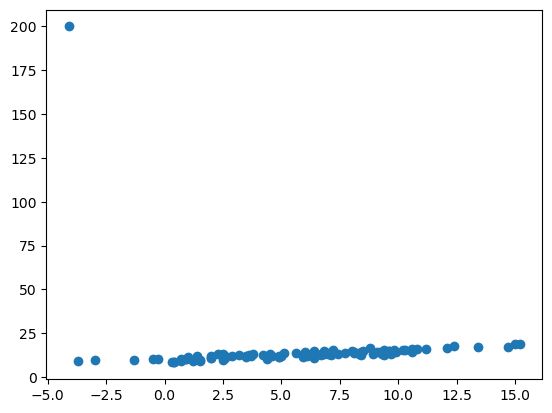

In [31]:
plt.plot(df_train.temp, df_train.ice_sales, 'o')
plt.show()

> 나머지 자료들은 모두 선형을 띄고 있는데, (-4.1, 200)이라는 이상치 하나가 모형의 설명을 어렵도록 만들고 있다.

### **B. 분석**
---




**`# 1` 일반적인 선형 회귀**

In [33]:
## 1
X = df_train[['temp']]
y = df_train.ice_sales

## 2
predictr = sklearn.linear_model.LinearRegression()

## 3
predictr.fit(X, y)

## 4
df_train = df_train.assign(ice_sales_hat = predictr.predict(X))

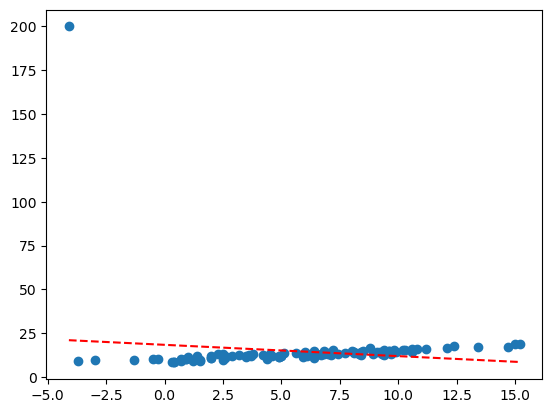

In [35]:
plt.plot(df_train.temp, df_train.ice_sales, 'o')
plt.plot(df_train.temp, df_train.ice_sales_hat, '--', color = 'red')
plt.show()

In [36]:
predictr.coef_

array([-0.64479089])

> 기울기가 음수이다.
> 
\- 늘 하던 것처럼 선형회귀로 적합했을 때, 해당 모형은 완전히 언더피팅된 것으로 보여진다...

**`# 2` 의사결정나무를 사용**

<span style=color:red>(주의!)</span> Lasso와 Ridge는 공선성이 있는 모델에서만 잘 작동할 뿐, 그렇지 않은 경우 선형회귀와 유사하게 적합되니 사용하지 말것!(Ridge는 설명변수가 적을 때 특히 똑같게 적합하는 것 같다.)

In [46]:
## 1
X = df_train[['temp']]
y = df_train.ice_sales

## 2
predictr = sklearn.tree.DecisionTreeRegressor()

## 3
predictr.fit(X, y)

## 4
df_train = df_train.assign(ice_sales_hat = predictr.predict(X))

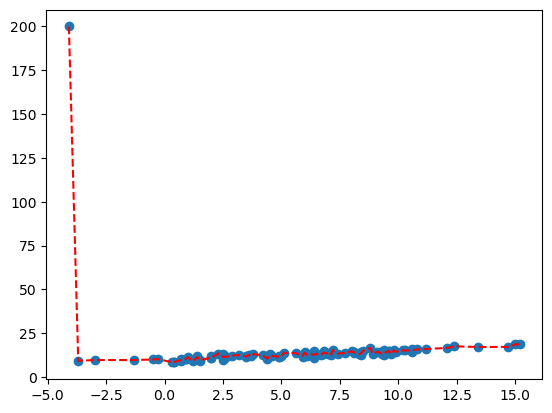

In [47]:
plt.plot(df_train.temp, df_train.ice_sales, 'o')
plt.plot(df_train.temp, df_train.ice_sales_hat, '--', color = 'red')
plt.show()

In [48]:
predictr.score(X, y)

0.9992029367488545

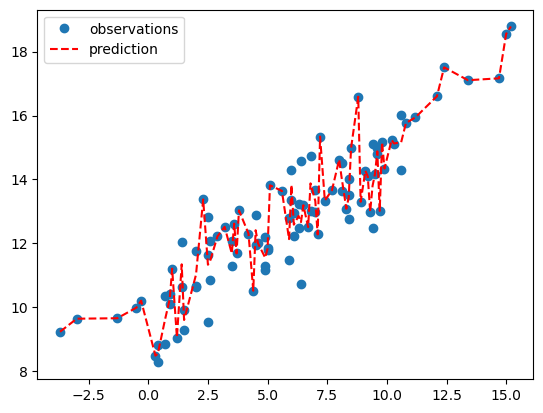

In [51]:
_df = df_train.drop(0, axis = 0)
plt.plot(_df.temp, _df.ice_sales, 'o', label = 'observations')
plt.plot(_df.temp, _df.ice_sales_hat, '--', color = 'red', label = 'prediction')
plt.legend()
plt.show()

> `DecisionTreeRegressor`의 경우 언더라잉만 적합하는 것을 넘어 오버피팅이 되게 하나, 결과는 언더피팅이 되는 경우보단 나름 합리적이다.
>
> <span style=color:red>적합에 관여한 구간 외의 값이 인풋으로 들어오면 해당 모형은 예측하지 못한다.</span>